<h2>Import Libraries</h2>

In [107]:
# ##Installing some Libraries for this technical activity
# !pip3 install --user geopy
#!pip3 install geopandas
# !pip3 install folium
# !pip3 install pandas seaborn matplotlib numpy

In [108]:
#data manipulation and visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#map libraries
# from geopy.geocoders import Nominatim
# import geopandas as gdp

<h2>Data Acquisition</h2>

### This is the act of acquiring the data into the environment.

In [109]:
#creating a variable that brings the data to the environment which is census_data
census_data = pd.read_csv('census04.csv')
census_data.head(10)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Jones Crossing,Victor,Richardson,61,Head,Single,Male,Lawyer,NaN,Christian
1,1,Jones Crossing,Duncan,Clark,62,NaN,Single,Male,Energy engineer,NaN,Christian
2,1,Jones Crossing,Sian,Page,21,NaN,Single,Female,University Student,NaN,Methodist
3,1,Jones Crossing,Kevin,Jones,44,NaN,Single,Male,Set designer,NaN,Methodist
4,1,Jones Crossing,Derek,Stephenson,28,NaN,Single,Male,Psychotherapist,NaN,Muslim
5,2,Jones Crossing,Wendy,Stevens,49,Head,Married,Female,"Administrator, arts",NaN,Christian
6,2,Jones Crossing,Benjamin,Stevens,51,Husband,Married,Male,"Engineer, production",NaN,Christian
7,2,Jones Crossing,Adam,Stevens,19,Son,Divorced,Male,University Student,NaN,Christian
8,2,Jones Crossing,Leon,Stevens,17,Son,NaN,Male,Student,NaN,NaN
9,3,Jones Crossing,Megan,Wilkinson,36,Head,Married,Female,Tour manager,NaN,Muslim


# Data Wrangling

Familarizing with the data which involves shape, size , column information , number of Nan values e.t.c

In [110]:
#checking the data types
census_data.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [111]:
#getting to know the columns
census_data.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [112]:
#the number of rows and columns available in this dataset
census_data.shape

(8237, 11)

In [113]:
#checking the statistical description
census_data.describe()

,House Number
count,8237.000000
mean,26.333859
std,27.525938
min,1.000000
25%,8.000000
50%,18.000000
75%,35.000000
max,167.000000


In [114]:
#missing values
census_data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     627
Marital Status                   1989
Gender                              0
Occupation                          0
Infirmity                        8163
Religion                         4865
dtype: int64

### It shows that the Marital Status  and Religion has huge number of Nan Values

In [115]:
#getting more information
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8237 non-null   int64 
 1   Street                         8237 non-null   object
 2   First Name                     8237 non-null   object
 3   Surname                        8237 non-null   object
 4   Age                            8237 non-null   object
 5   Relationship to Head of House  7610 non-null   object
 6   Marital Status                 6248 non-null   object
 7   Gender                         8237 non-null   object
 8   Occupation                     8237 non-null   object
 9   Infirmity                      74 non-null     object
 10  Religion                       3372 non-null   object
dtypes: int64(1), object(10)
memory usage: 708.0+ KB


### Creating a reusable functions to avoid repeats and performance to get the unique data each series contains.

In [116]:
#Digging Dip into each feature in the dataset
def CheckUnique(sub_data):
    data = census_data[sub_data].unique() # check for uniqueness in the columns 
   

    return data

#### Checking for uniqueness for all Series

In [117]:
CheckUnique('House Number')

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167])

In [118]:
CheckUnique('Street')

array(['Jones Crossing', 'Ripon Cove', "O'Sullivan Cape", 'Windy Dale',
       'Taylor Radial', 'The Squares', 'Smith Springs', 'Patel Camp',
       'Powys Key', 'St.Lukecoffer Crescent', 'Evans Road',
       'Richardson Estates', 'Carlisle Crest', 'Obelisk Avenue',
       'Dumnonia Road', 'Olympus Crescent', 'Turkey Avenue',
       'Goldfish Lane', 'Aberdeen Crescent', 'Vulture Parkway',
       'Brown Road', 'Edwards Mall', 'Jones Corners', 'Goddard Junction',
       'Upland Street', 'Unitycrib Drive', 'Mahogany Spurs',
       'Osborne Isle', 'Dixon Keys', 'Talbot Rapids', 'Shepherd Crescent',
       'Fletcher Spur', 'Sharp Orchard', 'Stephens Corners',
       'Bell Orchard', 'Manor Street', 'Crown Lane', 'Zigzag Expressway',
       'July Road', 'Walters Inlet', 'Jones Corner', 'Griffiths Village',
       'Cardiff Gardens', 'White Cliffs', 'Coconut Junctions',
       'Coronation Drive', 'Elliott Bypass', 'Albabow Avenue',
       'Beaver Divide', 'Johnson Street', 'Owen Overpass',
    

In [119]:
CheckUnique('First Name')

array(['Victor', 'Duncan', 'Sian', 'Kevin', 'Derek', 'Wendy', 'Benjamin',
       'Adam', 'Leon', 'Megan', 'Charlie', 'Jean', 'Natasha', 'Darren',
       'Vanessa', 'Amelia', 'Michael', 'Charlene', 'Geoffrey', 'Keith',
       'Norman', 'Melissa', 'William', 'Russell', 'Lesley', 'Hayley',
       'Eric', 'Gordon', 'Heather', 'Sean', 'Graeme', 'Nicole', 'Ruth',
       'Toby', 'Rosie', 'Allan', 'Christine', 'Dylan', 'Anthony',
       'Sandra', 'Antony', 'John', 'Edward', 'Max', 'Georgia', 'Damian',
       'Frances', 'Samuel', 'Bruce', 'Elaine', 'Clive', 'Leah', 'Eleanor',
       'Mohammad', 'Ryan', 'Donald', 'Lydia', 'Gerard', 'Denis',
       'Valerie', 'Kelly', 'Pauline', 'Gerald', 'Lorraine', 'Clare',
       'Sophie', 'Amber', 'Arthur', 'Jenna', 'Christian', 'Gary', 'Josh',
       'Amanda', 'Sheila', 'Kate', 'Harriet', 'Grace', 'Kirsty', 'Holly',
       'Michelle', 'Stephen', 'Caroline', 'Aaron', 'Marilyn', 'Alison',
       'Kenneth', 'Leigh', 'Dennis', 'Barry', 'Joanne', 'Joe', 'Sarah',


In [120]:
CheckUnique('Surname')

array(['Richardson', 'Clark', 'Page', 'Jones', 'Stephenson', 'Stevens',
       'Wilkinson', 'Rhodes', 'Faulkner', 'Turner', 'Marshall', 'Long',
       'Day-Khan', 'Hopkins', 'Robinson', 'Atkins', 'Richards', 'Pearson',
       'Burton', 'Clarke', 'Parker-Jenkins', 'Green', 'Simmons', 'Price',
       'Payne', 'Williams', 'Davies', 'Evans', 'Knight', 'Morley',
       'Wilson', 'Jenkins', 'Ahmed', 'Pearce', 'Porter', 'Barton',
       'Noble', 'Ashton', 'Birch', 'Bryant', 'Taylor', 'White', 'Wright',
       'Thomas', 'Bell', 'Bailey', 'Smart', 'Perry', 'Smith', 'Norton',
       'Johnson', 'Dale', 'Thompson-Sutton', 'Bennett', 'Hughes',
       'Elliott', 'Matthews', 'Reid', 'Griffiths', 'Miller', 'Lloyd',
       'Ryan', 'McDonald', 'Bond', 'Wheeler', 'Dobson', 'Foster',
       'Brennan', 'Lees', 'Harvey', 'Watson', 'Dawson', 'Brown', 'Kerr',
       'Scott', 'Hill', 'Lewis', 'Lowe', 'Howell', 'Joyce', 'Dodd',
       'Sims', 'Quinn', 'Spencer', 'Edwards', 'Daly', 'Ali', 'Heath',
       'Cross'

In [121]:
CheckUnique('Age')

array(['61', '62', '21', '44', '28', '49', '51', '19', '17', '36', '38',
       '6', '2', '43', '41', '15', '42', '5', '3', '73', '40', '13', '11',
       '7', '64', '39', '34', '48', '45', '14', '12', '50', '9', '58',
       '16', '10', '52', '54', '22', '63', '35', '26', '30', '33', '1',
       '25', '18', '46', '8', '37', '4', '29', '47', '53', '31', '24',
       '0', '55', '27', '69', '59', '66', '68', '20', '81', '32', '60',
       '23', '57', '56', '75', '65', '71', '67', '83', '76', '77', '84',
       '80', '85', '87', '70', '72', '79', '78', '89', '91', '88', '92',
       '74', '82', '104', '98', '90', '86', '97', '94', '96', ' ', '93',
       '49.0300851496455', '4.0', '3.0', '99', '57.90370851747044',
       '56.90370851747044', '10.0', '7.0', '59.57715584216195', '17.0',
       '15.0', '103', '102', '95', '106', '100', '101', '105', '107',
       '62.77766726084468'], dtype=object)

In [122]:
CheckUnique('Relationship to Head of House')

array(['Head', nan, 'Husband', 'Son', 'Daughter', 'Wife', 'Grandson',
       'Granddaughter', 'Nephew', 'Partner', 'Lodger', 'Sibling',
       'Adopted Son', 'Adopted Granddaughter', 'Step-Daughter',
       'Step-Son', 'Visitor', 'Cousin', 'Adopted Daughter', 'Neice', ' ',
       'Daughter-in-law'], dtype=object)

In [123]:
CheckUnique('Marital Status')

array(['Single', 'Married', 'Divorced', nan, 'Widowed'], dtype=object)

In [124]:
CheckUnique('Gender')

array(['Male', 'Female', ' '], dtype=object)

In [125]:
CheckUnique('Occupation')

array(['Lawyer', 'Energy engineer', 'University Student', ...,
       'Retired Location manager', 'Retired Engineer, water',
       'Retired Doctor, hospital'], dtype=object)

In [126]:
CheckUnique('Infirmity')

array([nan, 'Disabled', 'Mental Disability', 'Physical Disability',
       'Unknown Infection', ' ', 'Deaf', 'Blind'], dtype=object)

In [127]:
CheckUnique('Religion')

array(['Christian', 'Methodist', 'Muslim', nan, 'Catholic', 'Jewish',
       'Sikh', 'Private', 'Jedi', 'Agnostic', 'Undecided', 'Baptist',
       'Hindu', ' ', 'Orthodoxy', 'Sith', 'Pagan', 'Bahai'], dtype=object)

In [128]:
# convert your house Number data from float to int
census_house_number = census_data['House Number'].astype('int')
census_data.update(census_house_number)

### In other to remove empty strings and replace wrong words, we will create a function that can handle that accross board.

In [129]:
#creating a function that could check for empty strings, then replace with a new data then return the uniqueness 
def removeStringAndReplace(sub_data , new_data , index = None):
    first_filter = census_data.loc[census_data[sub_data] == ' ']
    
    if len(first_filter) > 1:
        second_filter = census_data.filter(items = [index] , axis = 0).replace(' ' , new_data)
        census_data.update(second_filter)
        return second_filter
           
    else:
        #replace the data with your prefered data
        census_data[sub_data] = census_data[sub_data].replace(' ' , new_data)
    
    

# Reformating the Age data

This is to check the missing data and make relevant analysis to know the rightful data to be replaced
census_data.loc[census_data['Age'] == ' ']

#### Since the age is missing , our analysis shows that the missing data has a marital status being divorced and the relationship to Head of House is Head. That shows the person is more than 18. And the median of the Age is 35

In [130]:
removeStringAndReplace('Age' , 35)

#### We have to convert the Age from string to number and replace zero with the median

In [131]:
#converting my age column to numerics and round it up to an integer
census_data['Age'] = pd.to_numeric(census_data['Age'], errors='coerce').round(0)
census_data['Age'] = census_data['Age'].astype('int')
# since there is no zero age too , we will be replacing the age with the the median of the distribution
census_data['Age'].replace(0 , census_data['Age'].median() , inplace = True)
#checks to see the unique figure in the data
CheckUnique('Age')



array([ 61,  62,  21,  44,  28,  49,  51,  19,  17,  36,  38,   6,   2,
        43,  41,  15,  42,   5,   3,  73,  40,  13,  11,   7,  64,  39,
        34,  48,  45,  14,  12,  50,   9,  58,  16,  10,  52,  54,  22,
        63,  35,  26,  30,  33,   1,  25,  18,  46,   8,  37,   4,  29,
        47,  53,  31,  24,  55,  27,  69,  59,  66,  68,  20,  81,  32,
        60,  23,  57,  56,  75,  65,  71,  67,  83,  76,  77,  84,  80,
        85,  87,  70,  72,  79,  78,  89,  91,  88,  92,  74,  82, 104,
        98,  90,  86,  97,  94,  96,  93,  99, 103, 102,  95, 106, 100,
       101, 105, 107])

# Working on Relationship to the Head data

In [132]:
# there are some typographical error in the relationship to the Head sub data which is neice to niece
census_data['Relationship to Head of House'].replace('Neice' , 'Niece' , inplace = True)

#### Checking for the analysis on the missing data in the Relationship to the Head data 

In [133]:
census_data.loc[census_data['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1967,52,Vulture Parkway,Leanne,Matthews,44,,Divorced,Female,Arts development officer,NaN,NaN
7441,54,Hazel Ford,Liam,Daly,15,,NaN,Male,Student,NaN,NaN


### Due to the fact that the Age is more than  18 and he is married , definitely the Relationship to the Head is Head for the first missing row.

In [134]:
removeStringAndReplace('Relationship to Head of House' , 'Head' , 1967)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1967,52,Vulture Parkway,Leanne,Matthews,44,Head,Divorced,Female,Arts development officer,NaN,NaN


In [135]:
#Working on the Nan Values on the Relationship to the Head data
census_data[(census_data['Relationship to Head of House'].isnull()) & (census_data['Marital Status'] == 'Single')& (census_data['Age'] > 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Jones Crossing,Duncan,Clark,62,NaN,Single,Male,Energy engineer,NaN,Christian
2,1,Jones Crossing,Sian,Page,21,NaN,Single,Female,University Student,NaN,Methodist
3,1,Jones Crossing,Kevin,Jones,44,NaN,Single,Male,Set designer,NaN,Methodist
4,1,Jones Crossing,Derek,Stephenson,28,NaN,Single,Male,Psychotherapist,NaN,Muslim
58,16,Jones Crossing,Ryan,Price,41,NaN,Single,Male,"Designer, furniture",NaN,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8121,2,Law Flat,Lynn,Richards,26,NaN,Single,Female,"Editor, magazine features",NaN,NaN
8125,5,Law Flat,Charlotte,Dennis,63,NaN,Single,Female,Environmental manager,NaN,Christian
8129,8,Law Flat,Arthur,Turner,30,NaN,Single,Male,Dentist,NaN,Catholic
8130,8,Law Flat,Samuel,Nixon,43,NaN,Single,Male,Set designer,Physical Disability,Christian


In [136]:
census_data[(census_data['Relationship to Head of House'].isnull()) & (census_data['Marital Status'] != 'Single') & (census_data['Age'] > 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
682,25,St.Lukecoffer Crescent,Jodie,Evans,36,NaN,Married,Female,Travel agency manager,NaN,NaN
683,25,St.Lukecoffer Crescent,Wayne,Evans,40,NaN,Married,Male,Translator,NaN,NaN
741,47,St.Lukecoffer Crescent,Anna,O'Sullivan,39,NaN,Married,Female,Financial manager,NaN,Christian
742,47,St.Lukecoffer Crescent,Alexander,O'Sullivan,40,NaN,Married,Male,"Engineer, biomedical",NaN,NaN
863,7,Richardson Estates,Eleanor,Hughes,25,NaN,Divorced,Female,"Designer, industrial/product",NaN,Christian
1104,101,Richardson Estates,Emma,Cox,51,NaN,Divorced,Female,Surgeon,NaN,Methodist
1393,2,Dumnonia Road,Sophie,Taylor,52,NaN,Married,Female,"Development worker, community",NaN,Catholic
1394,2,Dumnonia Road,Lewis,Taylor,50,NaN,Married,Male,Financial controller,NaN,Catholic
1396,2,Dumnonia Road,Daniel,Taylor,25,NaN,Divorced,Male,Public relations officer,NaN,Catholic
2170,13,Jones Corners,Harry,Byrne,31,NaN,Divorced,Male,"Engineer, automotive",NaN,NaN


In [137]:
census_data_missing_single_male = census_data[(census_data['Relationship to Head of House'].isnull()) & (census_data['Marital Status'] == 'Single') & (census_data['Gender'] == 'Male')& (census_data['Age'] > 18)]
census_data_missing_single_male_filtered = census_data['Relationship to Head of House'].replace(np.nan , 'Head')
census_data.update(census_data_missing_single_male_filtered)

In [138]:
census_data_missing_single_female = census_data[(census_data['Relationship to Head of House'].isnull()) & (census_data['Marital Status'] == 'Single') & (census_data['Gender'] == 'Female')& (census_data['Age'] > 18)]
census_data_missing_single_female_filtered = census_data['Relationship to Head of House'].replace(np.nan , 'Head')
census_data.update(census_data_missing_single_female_filtered)

In [139]:
census_data_missing_not_single_male = census_data[(census_data['Relationship to Head of House'].isnull()) & (census_data['Marital Status'] == 'Married') & (census_data['Gender'] == 'Male')& (census_data['Age'] > 18)]
census_data_missing_not_single_male_filtered = census_data['Relationship to Head of House'].replace(np.nan , 'Husband')
census_data.update(census_data_missing_not_single_male_filtered)

In [140]:
census_data_missing_not_single_female = census_data[(census_data['Relationship to Head of House'].isnull()) & (census_data['Marital Status'] == 'Married') & (census_data['Gender'] == 'Female')& (census_data['Age'] > 18)]
census_data_missing_not_single_female_filtered = census_data['Relationship to Head of House'].replace(np.nan , 'Wife')
census_data.update(census_data_missing_not_single_female_filtered)

In [141]:
# checks on the Age column
census_data['Age'] = census_data['Age'].astype('int')


In [142]:
### Due to the fact that the Age is less than  18 , definitely the Relationship to the Head is Son for the second missing row.

In [143]:
removeStringAndReplace('Relationship to Head of House' , 'Son' , 7441)

In [144]:
census_data.loc[census_data['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Checks to see if it has been fully replaced

In [145]:
# convert your house Number data from float to int
census_data['House Number'] = census_data['House Number'].astype('int')



# Working on the Marital Status Data

### Some analysis has to be made before we fill in our Nan values.

In [146]:
# creating the analysis on the marital status filter out the Nan values
census_data[census_data['Marital Status'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8,2,Jones Crossing,Leon,Stevens,17,Son,NaN,Male,Student,NaN,NaN
11,3,Jones Crossing,Jean,Wilkinson,6,Daughter,NaN,Female,Student,NaN,NaN
12,3,Jones Crossing,Natasha,Rhodes,2,Daughter,NaN,Female,Child,NaN,NaN
15,4,Jones Crossing,Amelia,Faulkner,17,Daughter,NaN,Female,Student,NaN,NaN
16,4,Jones Crossing,Michael,Faulkner,15,Son,NaN,Male,Student,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8221,1,England Folly,Kenneth,Russell,11,Son,NaN,Male,Student,NaN,NaN
8222,1,England Folly,Carolyn,Russell,11,Daughter,NaN,Female,Student,NaN,NaN
8223,1,England Folly,Kerry,Brooks,10,Daughter,NaN,Female,Student,NaN,NaN
8229,1,Scepter Factory,Ruth,Frost,9,Adopted Daughter,NaN,Female,Student,NaN,NaN


### IF THE AGE IS GREATER THAN 18 YEARS THEN THE MARITAL STATUS WONT BE SINGLE, IF THE OCCUPATION OF THE NAN VALUE IS CHILD IT HAS TO BE EITHER SON OR DAUGTHER DEPENDING ON THE GENDER.

In [147]:
marital_status_filtered = census_data[census_data['Marital Status'].isnull()]
age_less_than_eighteen = marital_status_filtered[marital_status_filtered['Age'] < 18]
age_less_than_eighteen_replaced = age_less_than_eighteen['Marital Status'].replace(np.nan , 'Single')
census_data.update(age_less_than_eighteen_replaced)

In [148]:
#checking the missing values of the age less than 18
census_data[census_data['Age'] < 18 ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8,2,Jones Crossing,Leon,Stevens,17,Son,Single,Male,Student,NaN,NaN
11,3,Jones Crossing,Jean,Wilkinson,6,Daughter,Single,Female,Student,NaN,NaN
12,3,Jones Crossing,Natasha,Rhodes,2,Daughter,Single,Female,Child,NaN,NaN
15,4,Jones Crossing,Amelia,Faulkner,17,Daughter,Single,Female,Student,NaN,NaN
16,4,Jones Crossing,Michael,Faulkner,15,Son,Single,Male,Student,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8221,1,England Folly,Kenneth,Russell,11,Son,Single,Male,Student,NaN,NaN
8222,1,England Folly,Carolyn,Russell,11,Daughter,Single,Female,Student,NaN,NaN
8223,1,England Folly,Kerry,Brooks,10,Daughter,Single,Female,Student,NaN,NaN
8229,1,Scepter Factory,Ruth,Frost,9,Adopted Daughter,Single,Female,Student,NaN,NaN


In [149]:
census_data[(census_data['Marital Status'] == 'Single') & (census_data['Occupation'] == 'Child') ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
12,3,Jones Crossing,Natasha,Rhodes,2,Daughter,Single,Female,Child,NaN,NaN
19,5,Jones Crossing,Keith,Turner,3,Son,Single,Male,Child,NaN,NaN
46,13,Jones Crossing,Toby,Clarke,3,Nephew,Single,Male,Child,NaN,NaN
65,18,Jones Crossing,Valerie,Knight,3,Daughter,Single,Female,Child,NaN,NaN
66,18,Jones Crossing,Kelly,Knight,1,Daughter,Single,Female,Child,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8176,1,Pendragon Granary,Ann,Tucker,1,Granddaughter,Single,Female,Child,NaN,NaN
8190,1,Frost Factory,Elaine,Shah,3,Daughter,Single,Female,Child,NaN,NaN
8191,1,Frost Factory,Helen,Shah,1,Daughter,Single,Female,Child,NaN,NaN
8199,1,Orry Hold,Shannon,Lewis,3,Daughter,Single,Female,Child,NaN,NaN


#### Working on the data occupation as child should be changed as single status

In [150]:
# writing a python on how to categorize the rest based on analysis
marital_status_filtered = census_data[(census_data['Marital Status'].isnull()) & (census_data['Occupation'] == 'Child') ]
marital_status_child = marital_status_filtered['Marital Status'].replace(np.nan , 'Single')
census_data.update(marital_status_child)

# Working on the Gender Data

In [151]:
#searching for empty data in the gender columns
census_data.loc[census_data['Gender'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5968,26,Murray Coves,Craig,Reed,56,Partner,Single,,Paediatric nurse,NaN,NaN


In [152]:
#using the function to remove and replace the empty string with the right data
removeStringAndReplace('Gender' , 'Male')

In [153]:
#checking for any null values
census_data['Gender'].isnull().sum()

0

# Working on the Occupation Data

In [154]:
CheckUnique('Occupation')

array(['Lawyer', 'Energy engineer', 'University Student', ...,
       'Retired Location manager', 'Retired Engineer, water',
       'Retired Doctor, hospital'], dtype=object)

In [155]:
#searching for empty data in the occupation columns and adjusting some of the occupation list
census_data['Occupation'].replace('Retired Engineer, water' ,'Retired Water Engineer', inplace=True)

In [156]:
#searching for empty data in the occupation columns and adjusting some of the occupation list
census_data['Occupation'].replace('Retired Doctor, hospital' ,'Retired Doctor', inplace=True)

In [157]:
# checking if there is any missing values
census_data['Occupation'].isnull().sum()

0

# Working on the Infirmity Data

In [158]:
#Checking the uniqueness of this Field
CheckUnique('Infirmity')

array([nan, 'Disabled', 'Mental Disability', 'Physical Disability',
       'Unknown Infection', ' ', 'Deaf', 'Blind'], dtype=object)

In [159]:
#searching for empty data in the infirmity columns
census_data.loc[census_data['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1498,36,Dumnonia Road,Luke,Stevenson,43,Head,Single,Male,Advertising account planner,,Jewish
2166,12,Jones Corners,Connor,Robinson,23,Son,Divorced,Male,Unemployed,,Catholic
2565,30,Osborne Isle,Glenn,Wallace,53,Husband,Married,Male,Medical secretary,,Catholic
3161,3,Fletcher Spur,Elaine,Robson,43,Head,Married,Female,Passenger transport manager,,Catholic
3758,1,Walters Inlet,Kate,Holland,5,Daughter,Single,Female,Student,,NaN
4029,14,Coronation Drive,Abdul,Walker,71,Husband,Married,Male,Retired Secondary school teacher,,NaN
4109,23,Elliott Bypass,Molly,Lynch,45,Head,Single,Female,Arts development officer,,Christian
4889,149,Williams Roads,Jonathan,Webb,37,Husband,Married,Male,Unemployed,,Sikh
5076,24,Edwards Fall,Malcolm,Dyer,56,Head,Single,Male,"Editor, commissioning",,NaN
6035,17,Holden Locks,Patricia,Smith,43,Head,Divorced,Female,Counselling psychologist,,Methodist


In [160]:
# checking out for the most frequent data
census_data['Infirmity'].mode()

0    Physical Disability
Name: Infirmity, dtype: object

In [161]:
census_data['Infirmity'].value_counts()

Infirmity
Physical Disability    18
Mental Disability      12
Disabled               11
                       11
Deaf                   11
Unknown Infection       7
Blind                   4
Name: count, dtype: int64

In [162]:
#checking Ages above 90s to see there infirmity
census_data[census_data['Age'] > 70]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
20,6,Jones Crossing,Norman,Marshall,73,Head,Widowed,Male,"Retired Designer, multimedia",NaN,Christian
154,18,Ripon Cove,Bethany,Harvey,81,Head,Single,Female,Retired Ergonomist,NaN,NaN
289,35,Windy Dale,Cameron,Morris,75,Head,Married,Male,Retired Geophysical data processor,NaN,Christian
294,36,Windy Dale,Justin,Hill,71,Husband,Married,Male,Retired Best boy,NaN,Christian
322,46,Windy Dale,Phillip,Bradley,83,Head,Married,Male,"Retired Horticulturist, commercial",NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8044,12,Metropolis Street,Denis,Smith,80,Husband,Married,Male,Retired Technical author,NaN,NaN
8118,1,Law Flat,Louise,Leach,78,Head,Widowed,Female,Retired Water Engineer,NaN,Christian
8126,6,Law Flat,Danielle,Harper,71,Head,Widowed,Female,Retired Ranger/warden,NaN,Christian
8127,7,Law Flat,Naomi,Green,71,Head,Single,Female,Retired International aid/development worker,NaN,NaN


In [163]:
#replace the empty data with the most frequent data
census_data['Infirmity'].replace(' ' , 'No Infirmity' , inplace=True)

In [164]:
#removing the missing values in the infimity column
census_data['Infirmity'].fillna('No Infirmity',inplace=True)

In [165]:
census_data.head(200)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Jones Crossing,Victor,Richardson,61,Head,Single,Male,Lawyer,No Infirmity,Christian
1,1,Jones Crossing,Duncan,Clark,62,Head,Single,Male,Energy engineer,No Infirmity,Christian
2,1,Jones Crossing,Sian,Page,21,Head,Single,Female,University Student,No Infirmity,Methodist
3,1,Jones Crossing,Kevin,Jones,44,Head,Single,Male,Set designer,No Infirmity,Methodist
4,1,Jones Crossing,Derek,Stephenson,28,Head,Single,Male,Psychotherapist,No Infirmity,Muslim
...,...,...,...,...,...,...,...,...,...,...,...
195,5,Windy Dale,Jordan,Heath,20,Son,Divorced,Male,University Student,No Infirmity,NaN
196,5,Windy Dale,Carly,Heath,15,Daughter,Single,Female,Student,No Infirmity,NaN
197,5,Windy Dale,Kerry,Heath,11,Daughter,Single,Female,Student,No Infirmity,NaN
198,5,Windy Dale,Leon,Heath,7,Son,Single,Male,Student,No Infirmity,NaN


# Working on the Religion Data

In [166]:
#most frequent data in the religion column and the value counts 
census_data['Religion'].value_counts()

Religion
Christian    1792
Catholic      897
Methodist     494
Muslim        108
Sikh           42
Jewish         26
Private         3
                1
Pagan           1
Sith            1
Orthodoxy       1
Agnostic        1
Hindu           1
Baptist         1
Undecided       1
Jedi            1
Bahai           1
Name: count, dtype: int64

In [167]:
#searching for empty data in the religion column
census_data.loc[census_data['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5902,17,Murray Coves,Amanda,Sanders,20,Lodger,Single,Female,University Student,No Infirmity,


In [168]:
#replace the empty data with the most frequent data
census_data['Religion'].replace(' ' , 'No Religion' , inplace=True)

In [169]:
# replace the na values in the religion data
census_data['Religion'].fillna( 'No Religion' , inplace=True)

In [170]:
#checking if the data has null
census_data.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

# This is the ending of the cleaning process!!!!

# Exploratory Data Analysis 

# Analysis trying to shed some light on the age census that shows lies or deceit.

In [171]:
#ages before 18th year birthday and they are the head of the house
census_data.loc[(census_data['Age'] < 18) & (census_data['Relationship to Head of House'] == 'Head')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
264,28,Windy Dale,Tracy,Vaughan,17,Head,Married,Female,Student,No Infirmity,No Religion
743,47,St.Lukecoffer Crescent,Lindsey,O'Sullivan,16,Head,Single,Female,Student,No Infirmity,No Religion
1397,2,Dumnonia Road,Eric,Taylor,17,Head,Single,Male,Student,No Infirmity,No Religion
2629,47,Osborne Isle,Julia,Green,17,Head,Single,Female,Student,No Infirmity,No Religion
2630,47,Osborne Isle,Jack,Green,16,Head,Single,Male,Student,No Infirmity,No Religion
2631,47,Osborne Isle,Kathleen,Green,16,Head,Single,Female,Student,No Infirmity,No Religion
3055,32,Shepherd Crescent,Gerald,Scott,16,Head,Single,Male,Student,No Infirmity,No Religion
3056,32,Shepherd Crescent,Lindsey,Scott,13,Head,Single,Female,Student,No Infirmity,No Religion
6755,19,Jarvis Locks,Ashley,Vaughan-Wilson,13,Head,Single,Male,Student,No Infirmity,No Religion
7987,1,Orchardnip Road,Brenda,Stone,17,Head,Single,Female,Unemployed,No Infirmity,No Religion


In [172]:
# This is more filtering to drill down the liers in the data
census_data.loc[(census_data['Age'] < 50) & (census_data['Relationship to Head of House'] == 'Head') & (census_data['Marital Status'] == 'Divorced') & (census_data['Occupation'] == 'Student')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
391,25,Taylor Radial,Jamie,Duncan,18,Head,Divorced,Male,Student,No Infirmity,No Religion
5428,9,Drummer Motorway,Tracy,Simpson,18,Head,Divorced,Female,Student,No Infirmity,No Religion


### General analysis of the whole Dataset

In [173]:
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Jones Crossing,Victor,Richardson,61,Head,Single,Male,Lawyer,No Infirmity,Christian
1,1,Jones Crossing,Duncan,Clark,62,Head,Single,Male,Energy engineer,No Infirmity,Christian
2,1,Jones Crossing,Sian,Page,21,Head,Single,Female,University Student,No Infirmity,Methodist
3,1,Jones Crossing,Kevin,Jones,44,Head,Single,Male,Set designer,No Infirmity,Methodist
4,1,Jones Crossing,Derek,Stephenson,28,Head,Single,Male,Psychotherapist,No Infirmity,Muslim
...,...,...,...,...,...,...,...,...,...,...,...
8232,1,Oyster Obervatory,Benjamin,Andrews,24,Son,Single,Male,Clinical embryologist,No Infirmity,Christian
8233,1,Oyster Obervatory,Luke,Andrews,24,Son,Divorced,Male,IT consultant,No Infirmity,No Religion
8234,1,Oyster Obervatory,Marion,Andrews,22,Daughter,Single,Female,University Student,No Infirmity,Christian
8235,1,Oyster Obervatory,Kyle,Andrews,22,Son,Single,Male,University Student,No Infirmity,Christian


#### This shows we have more students in the occupation trends.

In [174]:
# gathering the information on the general occupation during the count/survey
census_data['Occupation'].value_counts()


Occupation
Student                             1603
University Student                   543
Unemployed                           512
Child                                494
Chiropractor                          18
                                    ... 
Retired Biomedical engineer            1
Retired Stage manager                  1
Retired Customer service manager       1
Retired Dealer                         1
Retired Doctor                         1
Name: count, Length: 1019, dtype: int64

### Total amount of people in the data.

In [175]:
# we have to get the total amount of people in the data.
general_population = len(census_data)
general_population

8237

#### We have to get total household count

In [176]:
# we have to get the unique number of each household.
total_household_count = census_data['House Number'].nunique()
print(f'Household Count: {total_household_count}')

Household Count: 167


#### This would give us the level of ages in the population.

In [177]:
# this will split the ages into different categories
groups_of_ages = pd.cut(census_data['Age'], bins=[0, 18, 35, 60, float('inf')], labels=['0-18', '19-35', '36-60', '60+'])
age_group_using_population = census_data.groupby(groups_of_ages).size().reset_index(name='Population')
print(age_group_using_population)

     Age  Population
0   0-18        2034
1  19-35        2210
2  36-60        2853
3    60+        1140


In [178]:
#### Creating an Age pyramid scheme to know the ranges of the population

#getting the total number of the population
population_using_gender = census_data.groupby(['Gender', groups_of_ages]).size().unstack()
population_using_gender

Age,0-18,19-35,36-60,60+
Gender,,,,
Female,996,1138,1547,601
Male,1038,1072,1306,539


## Creating an Age pyramid scheme to know the ranges of the population

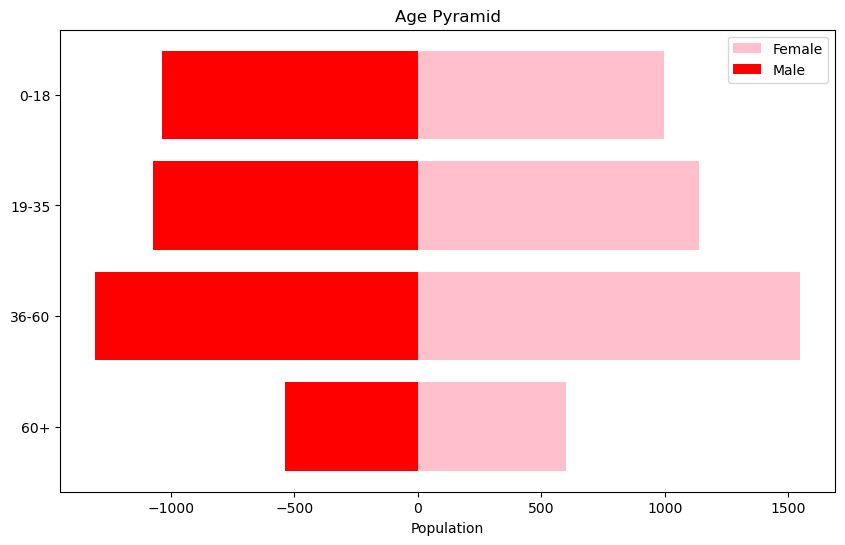

In [179]:

#these are the gender type in the Gender column
gen_index = ['Female', 'Male']

# Dataframe creation using pandas for its creation
population_by_age_gender = pd.DataFrame(population_using_gender, index=gen_index)

# using the matplotlib function to create subplots and stating the size of the charts too
fig, ax = plt.subplots(figsize=(10, 6))

#creating an horizontal barchart to show the  analysis of male to female

# plotting the female as the independent variable
ax.barh(population_by_age_gender.columns, population_by_age_gender.loc['Female'], color='pink', label='Female')

# plotting the male population as the dependent variable
ax.barh(population_by_age_gender.columns, -population_by_age_gender.loc['Male'], color='red', label='Male')

# Labelling and titles
ax.set_xlabel('Population')
ax.set_title('Age Pyramid')

# legend for clarity
ax.legend()

# making y-axis has the youngest age group
ax.invert_yaxis()

plt.show()


### Based on this analysis there will more of middle aged group ranging from the ages of 36 to the age of 60. There will be fewer older people and will range from the age of 60 years upward so therefore we will have less people retiring and more people in the workforce.

### This analysis shows that overtime there will be an increase in the workforce due to the growth of young age group.

# Unemployment trends

# Based on my research it is stated that ages below the age of 16 and ages above 66 are Unemployed in the Uk for a full time job

#### filtering out the unemployed data 

In [180]:
census_filtered = census_data[census_data['Occupation'] == 'Unemployed']
census_filtered

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
17,5,Jones Crossing,Charlene,Turner,42,Head,Single,Female,Unemployed,No Infirmity,Christian
47,14,Jones Crossing,Georgia,Parker-Jenkins,44,Head,Married,Female,Unemployed,No Infirmity,Catholic
80,22,Jones Crossing,Sheila,Davies,37,Head,Single,Female,Unemployed,No Infirmity,Catholic
106,29,Jones Crossing,Beth,Bell,53,Head,Single,Female,Unemployed,No Infirmity,No Religion
111,30,Jones Crossing,Mary,Ahmed,31,Head,Single,Female,Unemployed,No Infirmity,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
8033,7,Metropolis Street,Janet,Thomas,39,Head,Single,Female,Unemployed,No Infirmity,Catholic
8039,9,Metropolis Street,Julie,Riley,40,Head,Divorced,Female,Unemployed,No Infirmity,No Religion
8083,8,Marshall Pass,Hilary,Mistry,26,Head,Divorced,Female,Unemployed,No Infirmity,No Religion
8091,11,Marshall Pass,Shaun,Woodward,24,Head,Single,Male,Unemployed,No Infirmity,No Religion


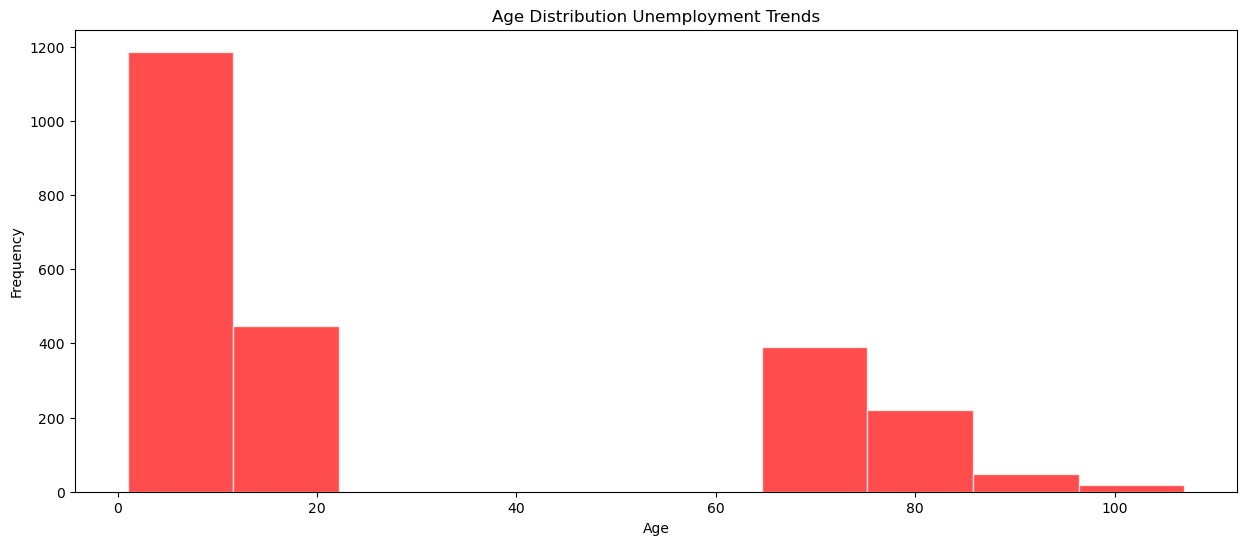

In [181]:
census_unemployed_filtered = census_data[(census_data['Age'] < 16) | (census_data['Age'] > 66)]
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(census_unemployed_filtered['Age'], bins=10, color='red', edgecolor='white', alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution Unemployment Trends')

plt.show()

### Plotting the box plot to show distribution of the Unemployment

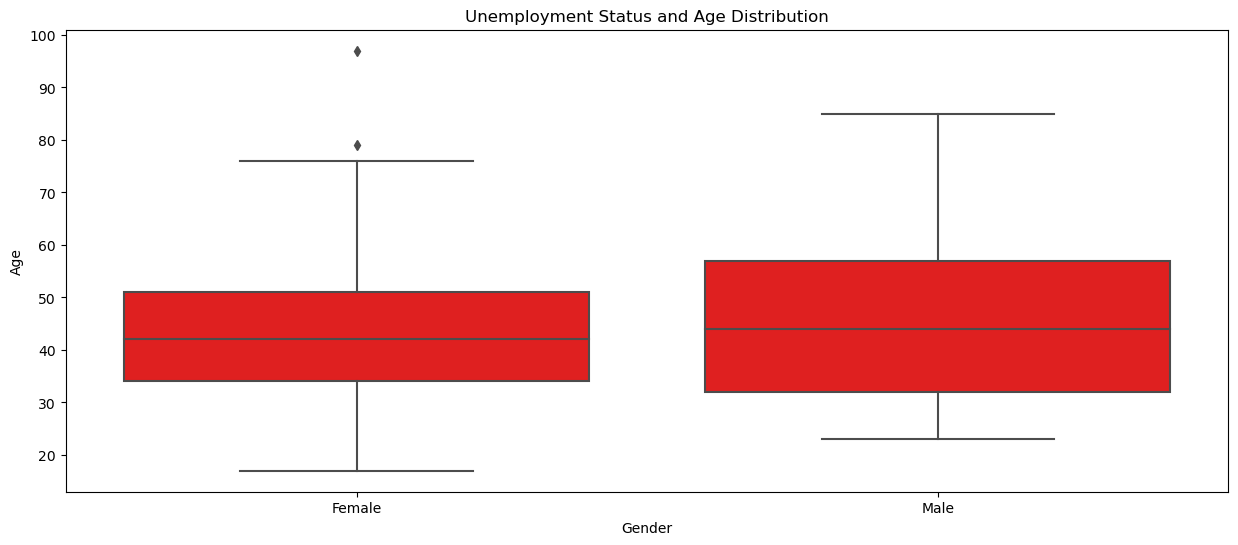

In [182]:
fig, ax = plt.subplots(figsize=(15, 6))
#plotting the graph
sns.boxplot(x='Gender', y='Age', data=census_filtered, color='red' , ax=ax)
# Labelling
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Unemployment Status and Age Distribution')

# Show the plot
plt.show()


# Religion Affliation

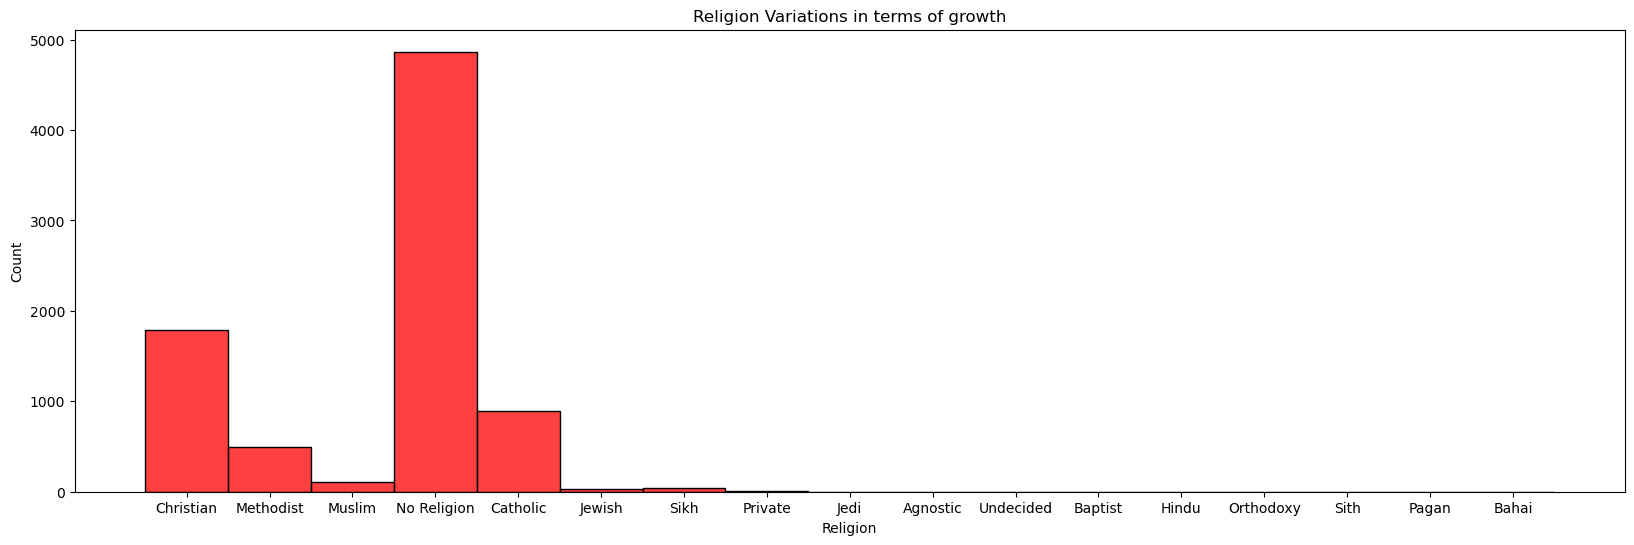

In [183]:
fig, ax = plt.subplots(figsize=(20, 6))

#plotting the graph
sns.histplot(data=census_data , x = 'Religion'  , color = 'red',  ax=ax)

# Labelling
plt.title('Religion Variations in terms of growth')

# Show the plot
plt.show()

### BASED ON THE RELIGIOUS DATA, IT SHOWS THAT THERE ARE MORE  NON-RELIGIOUS PEOPLE IN THE UK. THERE ARE GROWING RELIGION LIKE THE SIKH FROM THE INDIAN DESCENT

### MARRIAGE ANALYSIS AND HOW IT AFFECTS THE HOUSEHOLD

# DIVORCED

In [184]:
census_divorced = census_data[census_data['Marital Status']== 'Divorced']
census_divorced

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,2,Jones Crossing,Adam,Stevens,19,Son,Divorced,Male,University Student,No Infirmity,Christian
21,7,Jones Crossing,Melissa,Long,40,Head,Divorced,Female,Research scientist (physical sciences),No Infirmity,Muslim
28,8,Jones Crossing,Heather,Day-Khan,34,Daughter,Divorced,Female,Media buyer,No Infirmity,No Religion
39,11,Jones Crossing,Dylan,Pearson,42,Son,Divorced,Male,Analytical chemist,No Infirmity,Christian
55,15,Jones Crossing,Leah,Green,22,Daughter,Divorced,Female,University Student,No Infirmity,Methodist
...,...,...,...,...,...,...,...,...,...,...,...
8207,1,Williams Folly,Jemma,White,32,Head,Divorced,Female,Health and safety inspector,No Infirmity,Christian
8217,1,Williams Folly,Danielle,Metcalfe,18,Lodger,Divorced,Female,Student,No Infirmity,No Religion
8218,1,Williams Folly,Sean,Fowler,56,Lodger,Divorced,Male,Museum/gallery exhibitions officer,No Infirmity,No Religion
8226,1,Scepter Factory,Victor,Frost,28,Son,Divorced,Male,Curator,No Infirmity,Christian


# MARRIED

In [185]:
census_married = census_data[census_data['Marital Status']== 'Married']
census_married

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5,2,Jones Crossing,Wendy,Stevens,49,Head,Married,Female,"Administrator, arts",No Infirmity,Christian
6,2,Jones Crossing,Benjamin,Stevens,51,Husband,Married,Male,"Engineer, production",No Infirmity,Christian
9,3,Jones Crossing,Megan,Wilkinson,36,Head,Married,Female,Tour manager,No Infirmity,Muslim
10,3,Jones Crossing,Charlie,Wilkinson,38,Husband,Married,Male,Chief of Staff,No Infirmity,No Religion
13,4,Jones Crossing,Darren,Faulkner,43,Head,Married,Male,Furniture designer,No Infirmity,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
8194,1,Lichfield Commune,Ryan,Walters,31,Husband,Married,Male,"Designer, ceramics/pottery",Physical Disability,No Religion
8219,1,England Folly,Suzanne,Russell,45,Head,Married,Female,Firefighter,No Infirmity,Methodist
8220,1,England Folly,Robert,Russell,45,Husband,Married,Male,"Engineer, building services",No Infirmity,No Religion
8224,1,Scepter Factory,Jennifer,Frost,60,Head,Married,Female,Merchant navy officer,No Infirmity,Christian


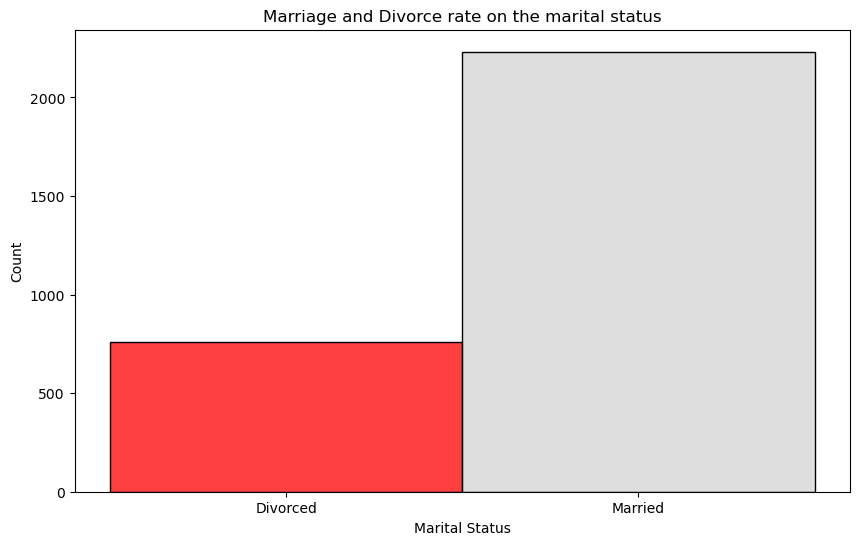

In [186]:
fig, ax = plt.subplots(figsize=(10, 6))

#plotting the graph
sns.histplot(data=census_divorced, x = 'Marital Status'  , color = 'red',  ax=ax)
sns.histplot(data=census_married , x = 'Marital Status'  , color = 'lightgray',  ax=ax)

# Labelling
plt.title('Marriage and Divorce rate on the marital status')

# Show the plot
plt.show()

## How it affect the HouseHold

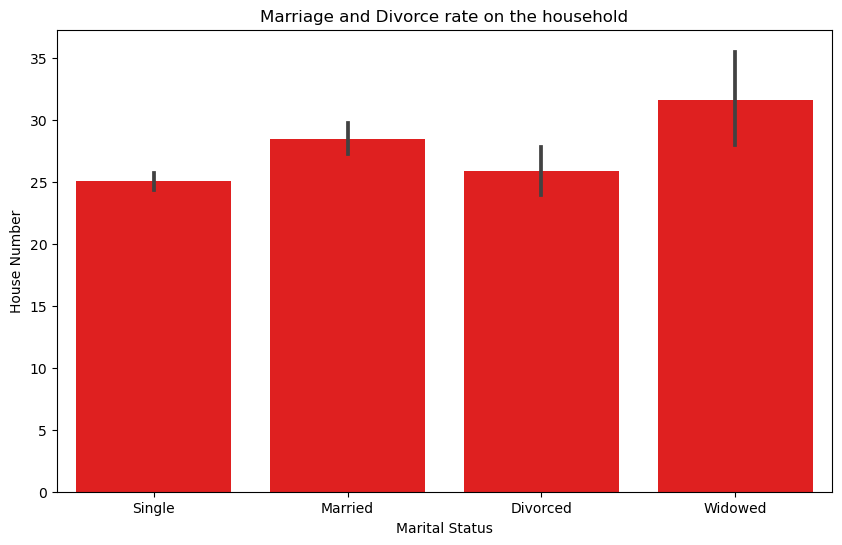

In [187]:
fig, ax = plt.subplots(figsize=(10, 6))

#plotting the graph
sns.barplot(data=census_data, x = 'Marital Status'  , y ='House Number' ,  color = 'red',  ax=ax)

# Labelling
plt.title('Marriage and Divorce rate on the household')

# Show the plot
plt.show()

### This shows that the increasing amount of Divorce has help to increase the number of households

# Occupancy Level

# This means that the average number of people staying in a room is 3 people and served as being overused.

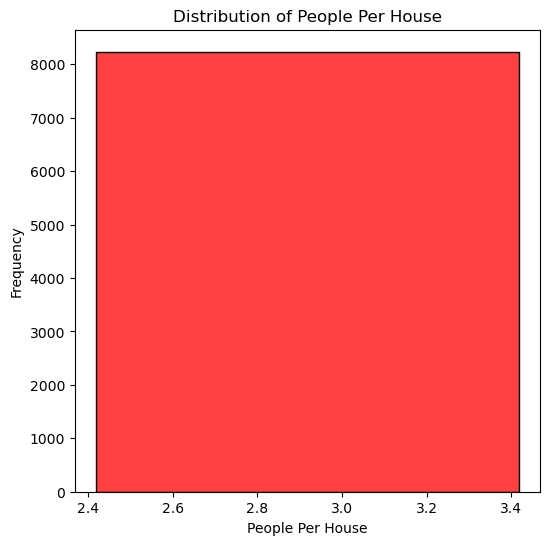

Housing is overused.


In [188]:
#Converting the house number to a string value so it can concatenate  with the Street
census_data['House Number'] = census_data['House Number'].astype('str')
# Concatenating the House Number with the street Name to get the House Number and Street Name together
census_data['Household'] = census_data['Street'] + ' ' + census_data['House Number']
#checking the number of unique house holds for each house
total_households = census_data['Household'].nunique()
#getting the total population of the census data
census_data['Total Population'] = general_population
#getting the total number of households in the data
census_data['Number of Houses'] = total_households
#getting the total people per each house
census_data['People_Per_House'] = census_data['Total Population'] / census_data['Number of Houses']

# visualizing distribution of people per house
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(census_data['People_Per_House'], color = 'red')
plt.title('Distribution of People Per House')
plt.xlabel('People Per House')
plt.ylabel('Frequency')
plt.show()

# Calculate the average people per house
avg_people_per_house = census_data['People_Per_House'].mean()

# Determine if housing is underused, overused, or balanced
if avg_people_per_house < 1:
    print('Housing is underused.')
elif 1 <= avg_people_per_house <= 2:
    print('Housing is reasonably used.')
else:
    print('Housing is overused.')

# University Student Commuting Analysis

# This shows that we have more than 7694 other professions and 543 university students

# Death Rate and Birth Rate of the data

In [189]:
# this will split the ages into different categories
groups_of_ages = pd.cut(census_data['Age'], bins=[0, 18, 35, 60, float('inf')], labels=['0-18', '19-35', '36-60', '60+'])
age_group_using_population = census_data.groupby(groups_of_ages).size().reset_index(name='Population')
print(age_group_using_population)

     Age  Population
0   0-18        2034
1  19-35        2210
2  36-60        2853
3    60+        1140


### This shows that there are more young people in the census data than older people. Which means that we might have more death rate than birth rate

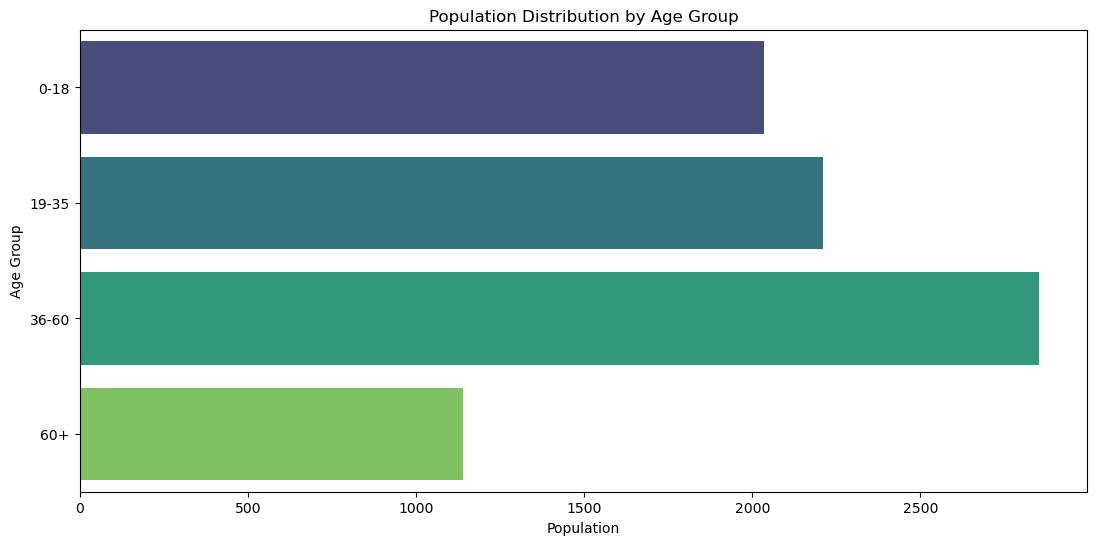

In [190]:

# Categorical visualization with Seaborn
plt.figure(figsize=(13, 6))
sns.barplot(x='Population', y='Age', data=age_group_using_population, palette='viridis')
plt.title('Population Distribution by Age Group')
plt.xlabel('Population')
plt.ylabel('Age Group')
plt.show()

### What should be built on an unoccupied plot of land that the local government wishes to develop?

### Exercise A(a)

What should be built on an unoccupied plot of land that the local government wishes to
develop?

High-density housing. This should be built if the population is significantly expanding.

## This should be high density housing because the number of occupancy level is increasing by the number of people per house.

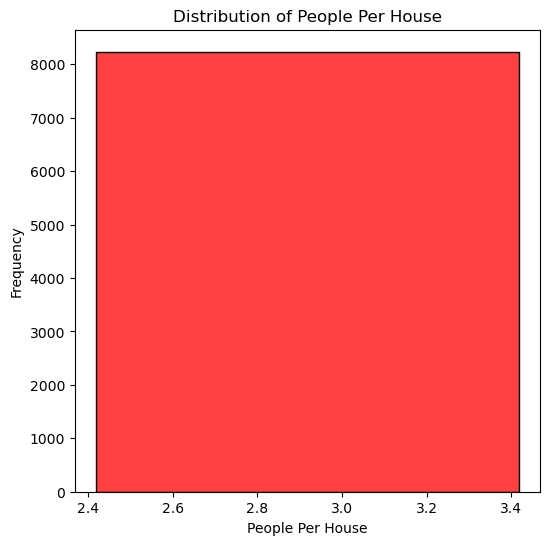

Housing is overused.


In [191]:
#Converting the house number to a string value so it can concatenate  with the Street
census_data['House Number'] = census_data['House Number'].astype('str')
# Concatenating the House Number with the street Name to get the House Number and Street Name together
census_data['Household'] = census_data['Street'] + ' ' + census_data['House Number']
#checking the number of unique house holds for each house
total_households = census_data['Household'].nunique()
#getting the total population of the census data
census_data['Total Population'] = general_population
#getting the total number of households in the data
census_data['Number of Houses'] = total_households
#getting the total people per each house
census_data['People_Per_House'] = census_data['Total Population'] / census_data['Number of Houses']

# visualizing distribution of people per house
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(census_data['People_Per_House'], color = 'red')
plt.title('Distribution of People Per House')
plt.xlabel('People Per House')
plt.ylabel('Frequency')
plt.show()

# Calculate the average people per house
avg_people_per_house = census_data['People_Per_House'].mean()

# Determine if housing is underused, overused, or balanced
if avg_people_per_house < 1:
    print('Housing is underused.')
elif 1 <= avg_people_per_house <= 2:
    print('Housing is reasonably used.')
else:
    print('Housing is overused.')

### Exercise A(b)

low-density housing. This should be built if the population is “affluent” and there is
demand for large family housing.

### There is also a need for large family housing too due the fact that we have more married people than divorce

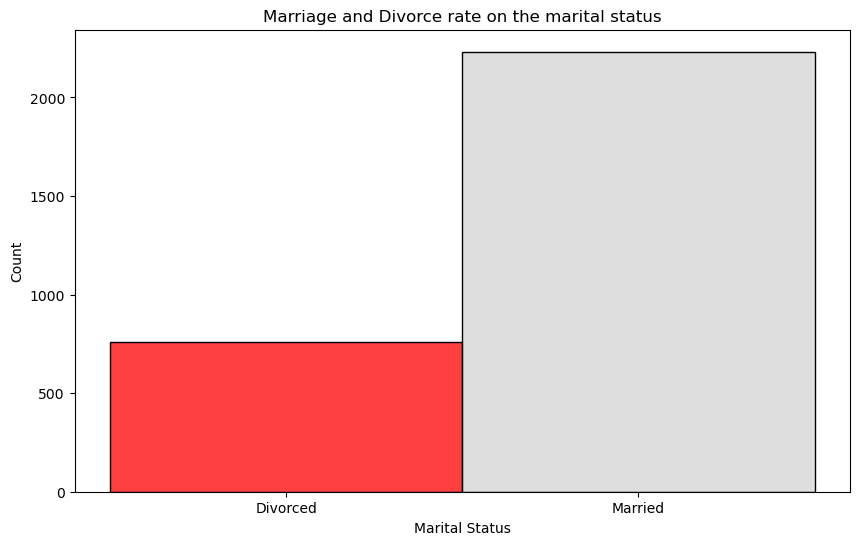

In [192]:
fig, ax = plt.subplots(figsize=(10, 6))

#plotting the graph
sns.histplot(data=census_divorced, x = 'Marital Status'  , color = 'red',  ax=ax)
sns.histplot(data=census_married , x = 'Marital Status'  , color = 'lightgray',  ax=ax)

# Labelling
plt.title('Marriage and Divorce rate on the marital status')

# Show the plot
plt.show()

### Exercise A(c)

Train station. There are potentially a lot of commuters in the town and building a train
station could take pressure off the roads. But how will you identify commuters?

In [193]:
for i in census_data['Occupation'].unique():
    print(i)

Lawyer
Energy engineer
University Student
Set designer
Psychotherapist
Administrator, arts
Engineer, production
Student
Tour manager
Chief of Staff
Child
Furniture designer
Research scientist (medical)
Unemployed
Retired Designer, multimedia
Research scientist (physical sciences)
Financial controller
Adult guidance worker
Media buyer
Equities trader
Engineer, control and instrumentation
Ergonomist
Immunologist
Associate Professor
Engineer, manufacturing systems
Analytical chemist
Journalist, magazine
Advertising account executive
Building surveyor
Psychotherapist, child
Immigration officer
Conference centre manager
Copywriter, advertising
Designer, furniture
Engineer, chemical
Publishing rights manager
Research scientist (life sciences)
Trading standards officer
Operations geologist
Cartographer
Land
Occupational therapist
Best boy
Social researcher
Fashion designer
Meteorologist
Wellsite geologist
Patent examiner
Designer, industrial/product
Landscape architect
Producer, television/fi

In [194]:
#filtering out the university students in the list in the occupation
uni_students = census_data[census_data['Occupation'] == 'University Student']
#getting the total length of the university student
num_uni_students = len(uni_students)
#printing the number of the university students
print(f'The number of university students: {num_uni_students}')
#getting other professionals that is not a university student as a list
census_professionals_filtered = census_data['Occupation'].unique()
census_professionals_filtered = list(dict.fromkeys(census_professionals_filtered))
del census_professionals_filtered[2]

#assigning the commuter professions 
commuter_professions = census_professionals_filtered

#check to see if it is likely they are on the list
likely_commuters = census_data[census_data['Occupation'].isin(commuter_professions)]
num_likely_commuters = len(likely_commuters)
print(f'The number of likely commuters in other professions: {num_likely_commuters}')
print(likely_commuters['Occupation'].value_counts())


The number of university students: 543
The number of likely commuters in other professions: 7694
Occupation
Student                                          1603
Unemployed                                        512
Child                                             494
Chiropractor                                       18
TEFL teacher                                       15
                                                 ... 
Retired Chemist, analytical                         1
Retired Emergency planning/management officer       1
Retired Archivist                                   1
Retired Computer games developer                    1
Retired Doctor                                      1
Name: count, Length: 1018, dtype: int64


### There is a need for train station since we have alot of other professional working in the town.

### Exercise A(D)

Religious building. There is already one place of worship for Catholics in the town. Is
there demand for a second Church (if so, which denomination?), or for a different religious building?

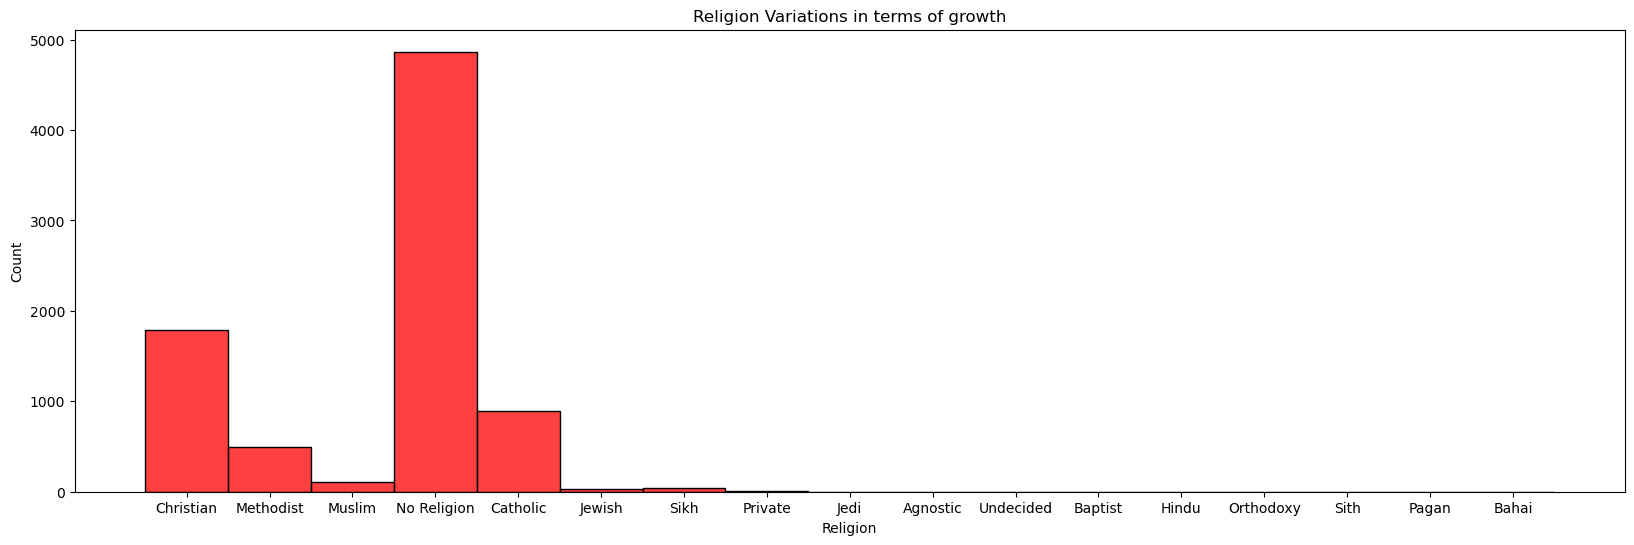

In [195]:
fig, ax = plt.subplots(figsize=(20, 6))

#plotting the graph
sns.histplot(data=census_data , x = 'Religion'  , color = 'red',  ax=ax)

# Labelling
plt.title('Religion Variations in terms of growth')

# Show the plot
plt.show()

### Based on the religious denominations apart from catholics ,  we have alot of christians , methodists too. We can have another church built there apart

## Exercise A(E)

Emergency medical building. Not a full hospital, but a minor injuries centre. This should
be built if there are many injuries or future pregnancies likely in the population.

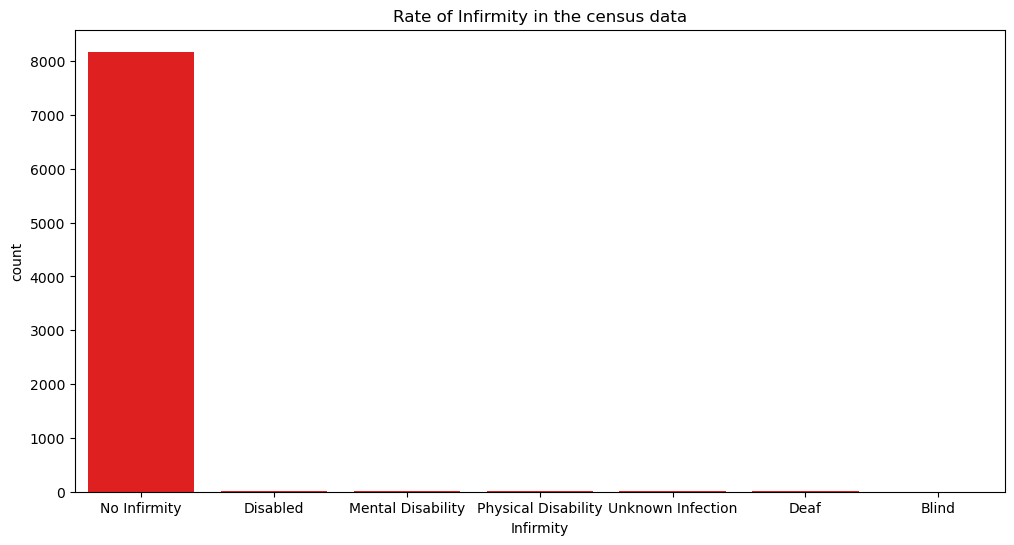

In [196]:
fig , ax = plt.subplots(figsize = (12,6))

sns.countplot(census_data, x="Infirmity" , color = 'red')

plt.title('Rate of Infirmity in the census data');


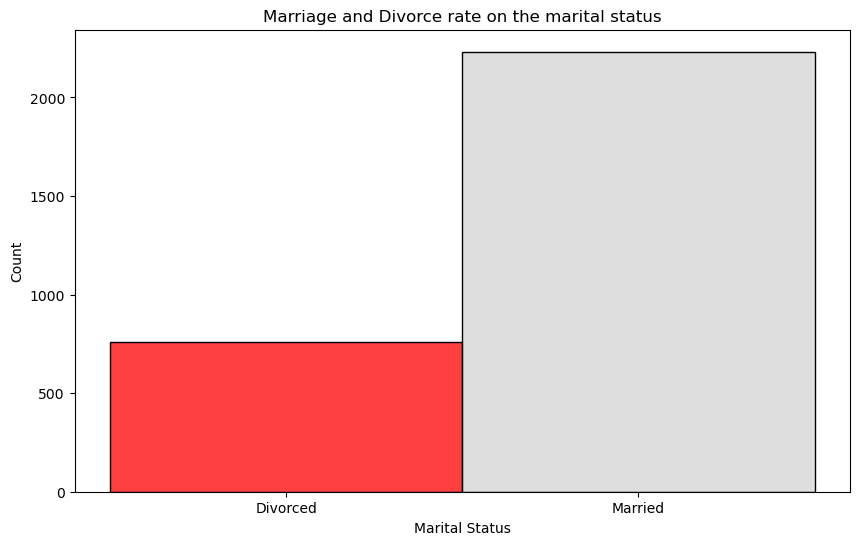

In [197]:
fig, ax = plt.subplots(figsize=(10, 6))

#plotting the graph
sns.histplot(data=census_divorced, x = 'Marital Status'  , color = 'red',  ax=ax)
sns.histplot(data=census_married , x = 'Marital Status'  , color = 'lightgray',  ax=ax)

# Labelling
plt.title('Marriage and Divorce rate on the marital status')

# Show the plot
plt.show()

## Based on the Analysis made , it is advisable to have a small medical facility due to less amount of medical conditions. but the rate of getting pregancies might also increase due to high number of married couples too.

### Exercise B(A)

Employment and training. If there is evidence for a lot of unemployment, we should re-
train people for new skills.

In [198]:
census_filtered = census_data[census_data['Occupation'] == 'Unemployed']
census_filtered

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Household,Total Population,Number of Houses,People_Per_House
17,5,Jones Crossing,Charlene,Turner,42,Head,Single,Female,Unemployed,No Infirmity,Christian,Jones Crossing 5,8237,2823,2.917818
47,14,Jones Crossing,Georgia,Parker-Jenkins,44,Head,Married,Female,Unemployed,No Infirmity,Catholic,Jones Crossing 14,8237,2823,2.917818
80,22,Jones Crossing,Sheila,Davies,37,Head,Single,Female,Unemployed,No Infirmity,Catholic,Jones Crossing 22,8237,2823,2.917818
106,29,Jones Crossing,Beth,Bell,53,Head,Single,Female,Unemployed,No Infirmity,No Religion,Jones Crossing 29,8237,2823,2.917818
111,30,Jones Crossing,Mary,Ahmed,31,Head,Single,Female,Unemployed,No Infirmity,No Religion,Jones Crossing 30,8237,2823,2.917818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8033,7,Metropolis Street,Janet,Thomas,39,Head,Single,Female,Unemployed,No Infirmity,Catholic,Metropolis Street 7,8237,2823,2.917818
8039,9,Metropolis Street,Julie,Riley,40,Head,Divorced,Female,Unemployed,No Infirmity,No Religion,Metropolis Street 9,8237,2823,2.917818
8083,8,Marshall Pass,Hilary,Mistry,26,Head,Divorced,Female,Unemployed,No Infirmity,No Religion,Marshall Pass 8,8237,2823,2.917818
8091,11,Marshall Pass,Shaun,Woodward,24,Head,Single,Male,Unemployed,No Infirmity,No Religion,Marshall Pass 11,8237,2823,2.917818


In [199]:
census_filtered.shape

(512, 15)

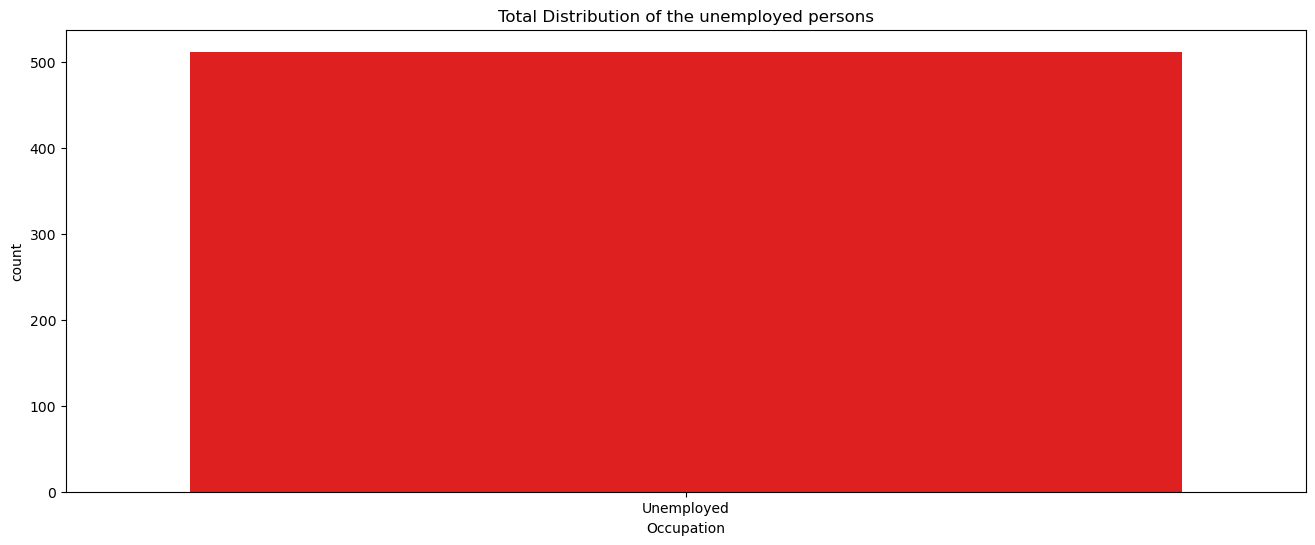

In [200]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(data = census_filtered , x = 'Occupation' , color = 'red')
plt.title('Total Distribution of the unemployed persons')
plt.show()


### Based on the analysis made , it is explained that we have 512 people that are unemployed in the census data

There is a need to train people for new skill they can benefit more from the skill acquisition

In [201]:
for i in census_data['Occupation'].unique():
    print(i)

Lawyer
Energy engineer
University Student
Set designer
Psychotherapist
Administrator, arts
Engineer, production
Student
Tour manager
Chief of Staff
Child
Furniture designer
Research scientist (medical)
Unemployed
Retired Designer, multimedia
Research scientist (physical sciences)
Financial controller
Adult guidance worker
Media buyer
Equities trader
Engineer, control and instrumentation
Ergonomist
Immunologist
Associate Professor
Engineer, manufacturing systems
Analytical chemist
Journalist, magazine
Advertising account executive
Building surveyor
Psychotherapist, child
Immigration officer
Conference centre manager
Copywriter, advertising
Designer, furniture
Engineer, chemical
Publishing rights manager
Research scientist (life sciences)
Trading standards officer
Operations geologist
Cartographer
Land
Occupational therapist
Best boy
Social researcher
Fashion designer
Meteorologist
Wellsite geologist
Patent examiner
Designer, industrial/product
Landscape architect
Producer, television/fi

## Exercise B(b)

Old age care. If there is evidence for increasing numbers of retired people in future years,
the town will need to allocate more funding for end of life care.

# Based on my research it is stated that  ages above 66 are retired in the Uk.

In [202]:
# Find unique values in the 'player_name' column containing the word 'retired'
retired_players = census_data[census_data['Occupation'].str.contains('Retired', case=False)]
retired_players

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Household,Total Population,Number of Houses,People_Per_House
20,6,Jones Crossing,Norman,Marshall,73,Head,Widowed,Male,"Retired Designer, multimedia",No Infirmity,Christian,Jones Crossing 6,8237,2823,2.917818
126,1,Ripon Cove,June,Hughes,69,Head,Divorced,Female,Retired Theatre manager,No Infirmity,Christian,Ripon Cove 1,8237,2823,2.917818
146,13,Ripon Cove,Mandy,Davies,68,Head,Single,Female,"Retired Therapist, occupational",No Infirmity,No Religion,Ripon Cove 13,8237,2823,2.917818
154,18,Ripon Cove,Bethany,Harvey,81,Head,Single,Female,Retired Ergonomist,No Infirmity,No Religion,Ripon Cove 18,8237,2823,2.917818
289,35,Windy Dale,Cameron,Morris,75,Head,Married,Male,Retired Geophysical data processor,No Infirmity,Christian,Windy Dale 35,8237,2823,2.917818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,1,Law Flat,Louise,Leach,78,Head,Widowed,Female,Retired Water Engineer,No Infirmity,Christian,Law Flat 1,8237,2823,2.917818
8126,6,Law Flat,Danielle,Harper,71,Head,Widowed,Female,Retired Ranger/warden,No Infirmity,Christian,Law Flat 6,8237,2823,2.917818
8127,7,Law Flat,Naomi,Green,71,Head,Single,Female,Retired International aid/development worker,No Infirmity,No Religion,Law Flat 7,8237,2823,2.917818
8132,9,Law Flat,Kimberley,Curtis,70,Head,Divorced,Female,Retired Doctor,No Infirmity,Christian,Law Flat 9,8237,2823,2.917818


In [203]:
retired_players.shape

(584, 15)

There are no retired person below 66, this shows the analysis was right

In [204]:
retired_players[retired_players['Age'] < 66]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Household,Total Population,Number of Houses,People_Per_House


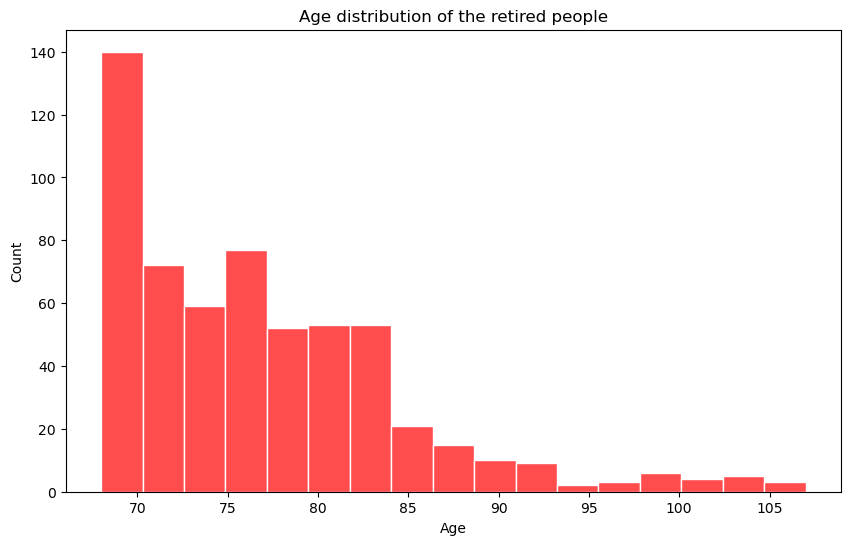

In [205]:
plt.figure(figsize=(10, 6))
sns.histplot(data = retired_players , x = 'Age' , color = 'red', edgecolor='white', alpha=0.7)
plt.title("Age distribution of the retired people");


### There are less increasing number of unemployed people in the society with 584 out of the 8237 of the total population

## Exercise B(c)

Increase spending for schooling. If there is evidence of a growing population of school-aged children (new births, or families moving in to the town), then schooling spend should increase.


In [206]:
census_data_school_age_children = census_data[ census_data['Age'] < 2]
census_data_school_age_children

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Household,Total Population,Number of Houses,People_Per_House
66,18,Jones Crossing,Kelly,Knight,1,Daughter,Single,Female,Child,No Infirmity,No Religion,Jones Crossing 18,8237,2823,2.917818
174,6,O'Sullivan Cape,Jade,Hughes,1,Daughter,Single,Female,Child,No Infirmity,No Religion,O'Sullivan Cape 6,8237,2823,2.917818
224,14,Windy Dale,Jack,Brown,1,Son,Single,Male,Child,No Infirmity,No Religion,Windy Dale 14,8237,2823,2.917818
239,18,Windy Dale,Antony,Davison,1,Son,Single,Male,Child,No Infirmity,No Religion,Windy Dale 18,8237,2823,2.917818
345,9,Taylor Radial,Samuel,Elliott,1,Son,Single,Male,Child,No Infirmity,No Religion,Taylor Radial 9,8237,2823,2.917818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,15,ExcaliburBells Creek,Benjamin,Watson,1,Son,Single,Male,Child,No Infirmity,No Religion,ExcaliburBells Creek 15,8237,2823,2.917818
7941,30,Williams Street,Liam,Leach,1,Son,Single,Male,Child,No Infirmity,No Religion,Williams Street 30,8237,2823,2.917818
7956,36,Williams Street,Ashley,Thomas,1,Son,Single,Male,Child,No Infirmity,No Religion,Williams Street 36,8237,2823,2.917818
8176,1,Pendragon Granary,Ann,Tucker,1,Granddaughter,Single,Female,Child,No Infirmity,No Religion,Pendragon Granary 1,8237,2823,2.917818


### Based on my research, it is shown that full time school starts by age 5.

In [207]:
census_data_school_age_children = census_data[ (census_data['Age'] > 5) & (census_data['Age'] < 18)]
census_data_school_age_children

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Household,Total Population,Number of Houses,People_Per_House
8,2,Jones Crossing,Leon,Stevens,17,Son,Single,Male,Student,No Infirmity,No Religion,Jones Crossing 2,8237,2823,2.917818
11,3,Jones Crossing,Jean,Wilkinson,6,Daughter,Single,Female,Student,No Infirmity,No Religion,Jones Crossing 3,8237,2823,2.917818
15,4,Jones Crossing,Amelia,Faulkner,17,Daughter,Single,Female,Student,No Infirmity,No Religion,Jones Crossing 4,8237,2823,2.917818
16,4,Jones Crossing,Michael,Faulkner,15,Son,Single,Male,Student,No Infirmity,No Religion,Jones Crossing 4,8237,2823,2.917818
22,7,Jones Crossing,William,Long,13,Son,Single,Male,Student,No Infirmity,No Religion,Jones Crossing 7,8237,2823,2.917818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8206,1,Evans Mansion,Jemma,Robinson,11,Daughter,Single,Female,Student,No Infirmity,No Religion,Evans Mansion 1,8237,2823,2.917818
8221,1,England Folly,Kenneth,Russell,11,Son,Single,Male,Student,No Infirmity,No Religion,England Folly 1,8237,2823,2.917818
8222,1,England Folly,Carolyn,Russell,11,Daughter,Single,Female,Student,No Infirmity,No Religion,England Folly 1,8237,2823,2.917818
8223,1,England Folly,Kerry,Brooks,10,Daughter,Single,Female,Student,No Infirmity,No Religion,England Folly 1,8237,2823,2.917818


In [208]:
census_data_school_age_children.shape

(1399, 15)

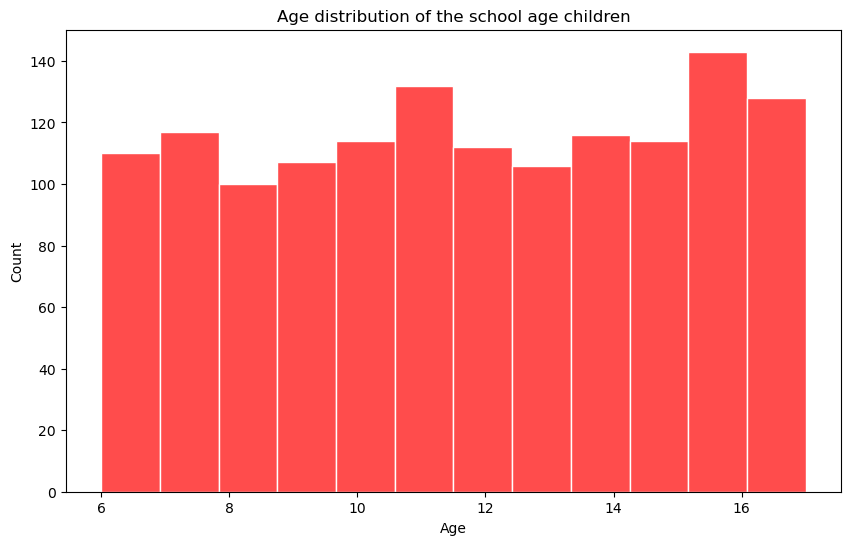

In [209]:
plt.figure(figsize=(10, 6))
sns.histplot(data = census_data_school_age_children , x = 'Age'  ,  color = 'red', edgecolor='white', alpha=0.7)
plt.title("Age distribution of the school age children");
plt.show();

## We have more than A thousand children in school, we need to increase funding for schools

## Exercise B(D)

General infrastructure. If the town is expanding, then services (waste collection; road
maintenance, etc.) will require more investment.

In [210]:
# this will split the ages into different categories
groups_of_ages = pd.cut(census_data['Age'], bins=[0, 18, 35, 60, float('inf')], labels=['0-18', '19-35', '36-60', '60+'])
age_group_using_population = census_data.groupby(groups_of_ages).size().reset_index(name='Population')
print(age_group_using_population)

     Age  Population
0   0-18        2034
1  19-35        2210
2  36-60        2853
3    60+        1140


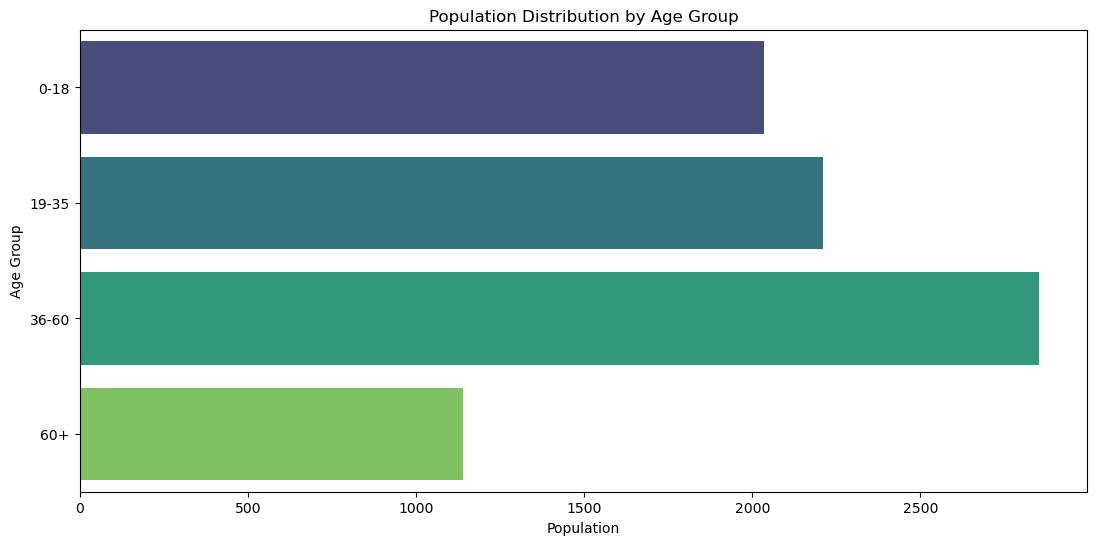

In [211]:
# Categorical visualization with Seaborn
plt.figure(figsize=(13, 6))
sns.barplot(x='Population', y='Age', data=age_group_using_population, palette='viridis')
plt.title('Population Distribution by Age Group')
plt.xlabel('Population')
plt.ylabel('Age Group')
plt.show()

### This shows that there are more young people in the census data than older people. Which means that we might have more death rate than birth rate

This shows that at this rate where we will have the population expanding, And there is a huge amount of increasing workforce.

This is will give rise to the need of infrastructure in the economy.